# TP1 Science des donnees - Chakirou ALABANI (alac_3501) - Amadou Selle NDIAYE (ndia2909)

In [2]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine,mahalanobis
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
data = pd.read_csv('../data.csv')
print(data.shape)
data.head()

(801, 20532)


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
data_labels = pd.read_csv('../labels.csv')
print(data_labels.shape)
data_labels.head()

(801, 2)


,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [5]:
print(data_labels['Class'][0])

PRAD


# Merge

In [6]:
df = pd.merge(data,data_labels, on='Unnamed: 0',how='inner')
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


# Pre-traitement

In [7]:
#Suppression de 'Unnamed: 0'
df= df.drop(columns=['Unnamed: 0'],axis=1)
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [8]:
#Selection de toutes les colonnes avec plus de 75 % de valeurs nulles
colonnes_a_supprimer=[]

for i in df.columns:
    s=0
    for j in range(df.shape[0]):
        if df[i][j] == 0:
            s+=1
    if (s/df.shape[0]) >= 0.75:
        colonnes_a_supprimer.append(i)

len(colonnes_a_supprimer)

1927

In [9]:
#Suppression des colonnes selctionnees
df_filtree = df.drop(columns=colonnes_a_supprimer,axis=1)

In [10]:
df_filtree.shape

(801, 18605)

In [11]:
# #Correlation entre les attributs et Suppression des attributs avec correlation > 0.7
# def correlation_entre_attributs(df,thresold):
#     attr=set()
#     corr_matrix=df.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i,j])>thresold:
#                 coln=corr_matrix.columns[i]
#                 attr.add(coln)
#     return attr   

In [12]:

# print("Attribut a supprimer")
# correlation_entre_attributs(df_filtree.drop('Class',axis=1),0.7)

In [66]:
# Méthode avec coefficient de Pearson
# Valeurs absolues de la corrélation avec 'Class' car corrélation est entre -1 et 1
correlation_matrix = df_filtree.drop('Class',axis=1).corr().abs() # par défaut utilise coefficient de Pearson


#correlation_with_class = correlation_matrix['Class'].abs()

# On trie les valeurs en ordre décroissant et on prend les 10 premiers
sorted_correlation = correlation_matrix.sort_values(ascending=False)
top_1000_attributes = sorted_correlation[1:1000].index.tolist()

print("(Pearson) Les 10 meilleurs attributs sont :", top_1000_attributes)

ValueError: could not convert string to float: 'PRAD'

In [ ]:
# Calculer la matrice de corrélation absolue
correlation_matrix = df_filtree.drop('Class', axis=1).corr().abs()

# Créer un masque pour la partie triangulaire supérieure
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Appliquer le masque et aplatir la matrice
correlations = correlation_matrix.mask(mask).unstack().dropna()

# Trier les corrélations par ordre croissant
sorted_correlations = correlations.sort_values()

# Sélectionner les 1000 paires les moins corrélées
least_correlated_pairs = sorted_correlations[:1000]

# Obtenir les attributs uniques de ces paires
least_correlated_attributes = set(least_correlated_pairs.index.get_level_values(0)) | set(least_correlated_pairs.index.get_level_values(1))

print(f"Nombre d'attributs les moins corrélés : {len(least_correlated_attributes)}")
print("Liste des attributs les moins corrélés :")
print(list(least_correlated_attributes))

In [13]:
#Representation des classes
df_filtree['Class'].value_counts()

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

# Methode 1: Calcul de distances

## 1.1 Calcul des centres de classes

In [14]:
#centre des classes pour la distance euclidienne et cosinus
centre_des_classe= {}

liste_classe = df_filtree['Class'].unique()

for classe in liste_classe:
    df_classe_i = df_filtree[df_filtree['Class']==classe]
    centre_df_classe_i = df_classe_i.drop(columns='Class',axis=1).mean()
    
    centre_des_classe[classe]= centre_df_classe_i


## 1.2 Distance Euclidienne

### - Distance intra-classe (Euclidienne)

In [15]:

distance_intra_classe_euclid={}


for classe  in liste_classe:

    #Selection des enregistrements avec la sortie classe
    dfclasse=df_filtree[df_filtree['Class']==classe]
    dfclasse_without_target=dfclasse.drop(columns='Class',axis=1)

    #Calcul de la distance euclidienne
    dist = np.linalg.norm(dfclasse_without_target- centre_des_classe[classe],axis=1)

    #Selection de la distance maximale
    distance_intra_classe_euclid[classe]= max(dist)


for classe, distance in distance_intra_classe_euclid.items():
    print(f"La distance intra-classe entre {classe} est {distance:.2f}")

La distance intra-classe entre PRAD est 238.83
La distance intra-classe entre LUAD est 255.74
La distance intra-classe entre BRCA est 256.19
La distance intra-classe entre KIRC est 261.30
La distance intra-classe entre COAD est 248.11


### - Distance inter-classe (Euclidienne)

In [16]:
distance_inter_classe_euclid = {}

for classe_i, classe_j in itertools.combinations(liste_classe, 2):
    
    #Selection des enregistrements avec la combinaison de deux classes differentes
    dfclasse_i = df_filtree[df_filtree['Class'] == classe_i]
    dfclasse_j = df_filtree[df_filtree['Class'] == classe_j]

    #Suppression de la colonne 'Class'
    dfclasse_i_without_target = dfclasse_i.drop(columns='Class', axis=1)
    dfclasse_j_without_target = dfclasse_j.drop(columns='Class', axis=1)

    #Calcul de la distance inter-classe euclidienne
    dist_i_j = np.linalg.norm(dfclasse_i_without_target - centre_des_classe[classe_j], axis=1)

    dist_j_i = np.linalg.norm(dfclasse_j_without_target - centre_des_classe[classe_i], axis=1)

    #Sele
    distance_inter_classe_euclid[f"{classe_i} - {classe_j}"] = min(np.min(dist_i_j), np.min(dist_j_i))


for classe, distance in distance_inter_classe_euclid.items():
    print(f"La distance inter-classe entre {classe} est {distance:.2f}")


La distance inter-classe entre PRAD - LUAD est 185.48
La distance inter-classe entre PRAD - BRCA est 176.37
La distance inter-classe entre PRAD - KIRC est 225.05
La distance inter-classe entre PRAD - COAD est 216.53
La distance inter-classe entre LUAD - BRCA est 166.35
La distance inter-classe entre LUAD - KIRC est 198.81
La distance inter-classe entre LUAD - COAD est 180.42
La distance inter-classe entre BRCA - KIRC est 213.97
La distance inter-classe entre BRCA - COAD est 195.65
La distance inter-classe entre KIRC - COAD est 220.86


### - OverLap (Euclidienne)

In [17]:
overlap_euclid = {}

for i, classe_i in enumerate(liste_classe):
    for classe_j in liste_classe[i+1:]:

        key = f"{classe_i} - {classe_j}"
        distance_inter_i_j = distance_inter_classe_euclid[key]
        
        #Calcul de l'overlap
        overlap_i_j = (distance_intra_classe_euclid[classe_i] + distance_intra_classe_euclid[classe_j]) / (2 * distance_inter_i_j)
        overlap_euclid[key] = overlap_i_j

for classe, distance in overlap_euclid.items():
    print(f"L'overlap de {classe} est {distance:.2f}")

    if distance < 1:
        print(f"les classes {classe} sont bien separees.")
    else:
        print(f"les classes {classe} ne sont pas bien separees.")


L'overlap de PRAD - LUAD est 1.33
les classes PRAD - LUAD ne sont pas bien separees.
L'overlap de PRAD - BRCA est 1.40
les classes PRAD - BRCA ne sont pas bien separees.
L'overlap de PRAD - KIRC est 1.11
les classes PRAD - KIRC ne sont pas bien separees.
L'overlap de PRAD - COAD est 1.12
les classes PRAD - COAD ne sont pas bien separees.
L'overlap de LUAD - BRCA est 1.54
les classes LUAD - BRCA ne sont pas bien separees.
L'overlap de LUAD - KIRC est 1.30
les classes LUAD - KIRC ne sont pas bien separees.
L'overlap de LUAD - COAD est 1.40
les classes LUAD - COAD ne sont pas bien separees.
L'overlap de BRCA - KIRC est 1.21
les classes BRCA - KIRC ne sont pas bien separees.
L'overlap de BRCA - COAD est 1.29
les classes BRCA - COAD ne sont pas bien separees.
L'overlap de KIRC - COAD est 1.15
les classes KIRC - COAD ne sont pas bien separees.


## 1.3 Distance Cosinus

###  - Distance intra-classe (Cosinus)

In [18]:
distance_intra_classe_cosinus = {}

for classe in liste_classe:
    df_classe = df_filtree[df_filtree['Class'] == classe]
    centre = centre_des_classe[classe]

    #Calcul des distances en les mettant dans une liste
    distances = [cosine(row, centre) for row in df_classe.drop(columns='Class', axis=1).values]

    distance_intra_classe_cosinus[classe] = max(distances)

for classe, distance in distance_intra_classe_cosinus.items():
    print(f"La distance intra-classe entre {classe} est {distance:.4f}")

La distance intra-classe entre PRAD est 0.0245
La distance intra-classe entre LUAD est 0.0281
La distance intra-classe entre BRCA est 0.0287
La distance intra-classe entre KIRC est 0.0282
La distance intra-classe entre COAD est 0.0231


### - Distance inter-classe (Cosinus)

In [19]:
distance_inter_classe_cosinus = {}

for classe_i, classe_j in itertools.combinations(liste_classe,2):

    dfclasse_i = df_filtree[df_filtree['Class'] == classe_i]
    dfclasse_i_without_target = dfclasse_i.drop(columns='Class', axis=1)

    dfclasse_j = df_filtree[df_filtree['Class'] == classe_j]
    dfclasse_j_without_target = dfclasse_j.drop(columns='Class', axis=1)

    dist_i_j = [cosine(dfclasse_i_without_target.iloc[x, :], centre_des_classe[classe_j]) for x in range(dfclasse_i_without_target.shape[0])]
    dist_j_i = [cosine(dfclasse_j_without_target.iloc[z, :], centre_des_classe[classe_i]) for z in range(dfclasse_j_without_target.shape[0])]

    distance_inter_classe_cosinus[f"{classe_i} - {classe_j}"] = min(min(dist_i_j), min(dist_j_i))
    
        

for classe, distance in distance_inter_classe_cosinus.items():
    print(f"La distance inter-classe entre {classe} est {distance:.4f}")


La distance inter-classe entre PRAD - LUAD est 0.0140
La distance inter-classe entre PRAD - BRCA est 0.0125
La distance inter-classe entre PRAD - KIRC est 0.0207
La distance inter-classe entre PRAD - COAD est 0.0193
La distance inter-classe entre LUAD - BRCA est 0.0112
La distance inter-classe entre LUAD - KIRC est 0.0160
La distance inter-classe entre LUAD - COAD est 0.0138
La distance inter-classe entre BRCA - KIRC est 0.0188
La distance inter-classe entre BRCA - COAD est 0.0157
La distance inter-classe entre KIRC - COAD est 0.0201


### - Overlap (Cosinus)

In [20]:
overlap_cosinus={}

for i,classe_i in enumerate(liste_classe):
    
    for j,classe_j in enumerate(liste_classe[i+1:],start=i+1):
        key=f"{classe_i} - {classe_j}"
        distance_inter_i_j= distance_inter_classe_cosinus[key]

        #Calcul de l'overlap
        overlap_i_j = (distance_intra_classe_cosinus[classe_i] + distance_intra_classe_cosinus[classe_j])/ (2 * distance_inter_i_j)
        overlap_cosinus[key]=overlap_i_j


for classe, distance in overlap_cosinus.items():
    print(f"L'overlap de {classe} est {distance:.2f}")

    if distance < 1:
        print(f"les classes {classe} sont bien separees.")
    else:
        print(f"les classes {classe} ne sont pas bien separees.")


L'overlap de PRAD - LUAD est 1.88
les classes PRAD - LUAD ne sont pas bien separees.
L'overlap de PRAD - BRCA est 2.13
les classes PRAD - BRCA ne sont pas bien separees.
L'overlap de PRAD - KIRC est 1.27
les classes PRAD - KIRC ne sont pas bien separees.
L'overlap de PRAD - COAD est 1.23
les classes PRAD - COAD ne sont pas bien separees.
L'overlap de LUAD - BRCA est 2.53
les classes LUAD - BRCA ne sont pas bien separees.
L'overlap de LUAD - KIRC est 1.76
les classes LUAD - KIRC ne sont pas bien separees.
L'overlap de LUAD - COAD est 1.86
les classes LUAD - COAD ne sont pas bien separees.
L'overlap de BRCA - KIRC est 1.52
les classes BRCA - KIRC ne sont pas bien separees.
L'overlap de BRCA - COAD est 1.65
les classes BRCA - COAD ne sont pas bien separees.
L'overlap de KIRC - COAD est 1.28
les classes KIRC - COAD ne sont pas bien separees.


## 1.4 Distance Mahalanobis

In [21]:
#Selection apres plusieurs de test de 150 attributs aleatoire pour la distance mahalanobis
#df_mahalanobis_selection=df_filtree.iloc[:,13700:13850]
df_mahalanobis_selection=df_filtree.iloc[:,12700:12850]
df_mahalanobis_selection['Class']=df_filtree['Class']

In [22]:

centre_des_classe_mahalanobis= {}

#Centre des classes pour la selection des attributs 
for classe in liste_classe:
    df_classe_i = df_mahalanobis_selection[df_mahalanobis_selection['Class']==classe]
    centre_df_classe_i = df_classe_i.drop(columns='Class',axis=1).mean()
    
    centre_des_classe_mahalanobis[classe]= centre_df_classe_i


### - Distance intra-classe (Mahalanobis)

In [23]:
distance_intra_classe_mahalanobis={}

for classe  in liste_classe:
    
    dfclasse=df_mahalanobis_selection[df_mahalanobis_selection['Class']==classe]
    dfclasse_without_target=dfclasse.drop(columns='Class',axis=1).values

    #Calcul de la covariance 
    cov= np.cov(dfclasse_without_target.T)

    dist = [mahalanobis(dfclasse_without_target[i,:],centre_des_classe_mahalanobis[classe],np.linalg.pinv(cov)) for i in range(dfclasse_without_target.shape[0]) ]
        
    distance_intra_classe_mahalanobis[classe]= max(dist)


for classe, distance in distance_intra_classe_mahalanobis.items():
    print(f"La distance intra-classe entre {classe} est {distance:.2f}")

La distance intra-classe entre PRAD est 11.58
La distance intra-classe entre LUAD est 11.79
La distance intra-classe entre BRCA est 15.71
La distance intra-classe entre KIRC est 12.00
La distance intra-classe entre COAD est 8.72


### - Distance inter-classe (Mahalanobis)

In [24]:
distance_inter_classe_mahalanobis={}

for classe_i,classe_j  in itertools.combinations(liste_classe,2):

   dfclasse_i = df_mahalanobis_selection[df_mahalanobis_selection['Class']==classe_i]
   dfclasse_without_target_i = dfclasse_i.drop(columns='Class',axis=1)

   dfclasse_j = df_mahalanobis_selection[df_mahalanobis_selection['Class']==classe_j]
   dfclasse_without_target_j = dfclasse_j.drop(columns='Class',axis=1)


   dist_i_j = [mahalanobis(dfclasse_without_target_i.iloc[x,:],centre_des_classe_mahalanobis[classe_j].values,np.linalg.pinv(np.cov(dfclasse_without_target_j.T)))
               for x in range(dfclasse_without_target_i.shape[0])]
   

   dist_j_i = [mahalanobis(dfclasse_without_target_j.iloc[z,:],centre_des_classe_mahalanobis[classe_i].values,np.linalg.pinv(np.cov(dfclasse_without_target_i.T))) 
                     for z in range(dfclasse_without_target_j.shape[0])]
    
      
   distance_inter_classe_mahalanobis[f"{classe_i} - {classe_j}"]= min(min(dist_i_j), min(dist_j_i))

for classe, distance in distance_inter_classe_mahalanobis.items():
   print(f"La distance inter-classe entre {classe} est {distance:.2f}")


La distance inter-classe entre PRAD - LUAD est 46.07
La distance inter-classe entre PRAD - BRCA est 21.84
La distance inter-classe entre PRAD - KIRC est 75.98
La distance inter-classe entre PRAD - COAD est 16.66
La distance inter-classe entre LUAD - BRCA est 19.10
La distance inter-classe entre LUAD - KIRC est 36.11
La distance inter-classe entre LUAD - COAD est 16.45
La distance inter-classe entre BRCA - KIRC est 24.74
La distance inter-classe entre BRCA - COAD est 19.60
La distance inter-classe entre KIRC - COAD est 15.32


### - Overlap (Mahalanobis)

In [25]:
overlap_mahalanobis={}

for i,classe_i in enumerate(liste_classe):
    
    for classe_j in liste_classe[i+1:]:
        key=f"{classe_i} - {classe_j}"
        distance_inter_i_j= distance_inter_classe_mahalanobis[key]

        overlap_i_j = (distance_intra_classe_mahalanobis[classe_i] + distance_intra_classe_mahalanobis[classe_j])/ (2 * distance_inter_i_j)
        overlap_mahalanobis[key]=overlap_i_j


for key, value in overlap_mahalanobis.items():
    print(f"L'overlap de {key} est {value:.2f}")

    if value < 1:
        print(f"les classes {key} sont bien separees.")
    else:
        print(f"les classes {key} ne sont pas bien separees.")


L'overlap de PRAD - LUAD est 0.25
les classes PRAD - LUAD sont bien separees.
L'overlap de PRAD - BRCA est 0.62
les classes PRAD - BRCA sont bien separees.
L'overlap de PRAD - KIRC est 0.16
les classes PRAD - KIRC sont bien separees.
L'overlap de PRAD - COAD est 0.61
les classes PRAD - COAD sont bien separees.
L'overlap de LUAD - BRCA est 0.72
les classes LUAD - BRCA sont bien separees.
L'overlap de LUAD - KIRC est 0.33
les classes LUAD - KIRC sont bien separees.
L'overlap de LUAD - COAD est 0.62
les classes LUAD - COAD sont bien separees.
L'overlap de BRCA - KIRC est 0.56
les classes BRCA - KIRC sont bien separees.
L'overlap de BRCA - COAD est 0.62
les classes BRCA - COAD sont bien separees.
L'overlap de KIRC - COAD est 0.68
les classes KIRC - COAD sont bien separees.


# 2- Visualisation des donnees

## 2-1 Distribution de

In [26]:
attributs_sel =['gene_4', 'gene_20528','Class']

class_data = {}

# Création d'un sous ensemble composés des attributs choisis
df_selected = df_filtree[attributs_sel]

for classe in df_selected['Class'].unique():
    class_data[classe] = df_selected[df_selected['Class'] == classe]


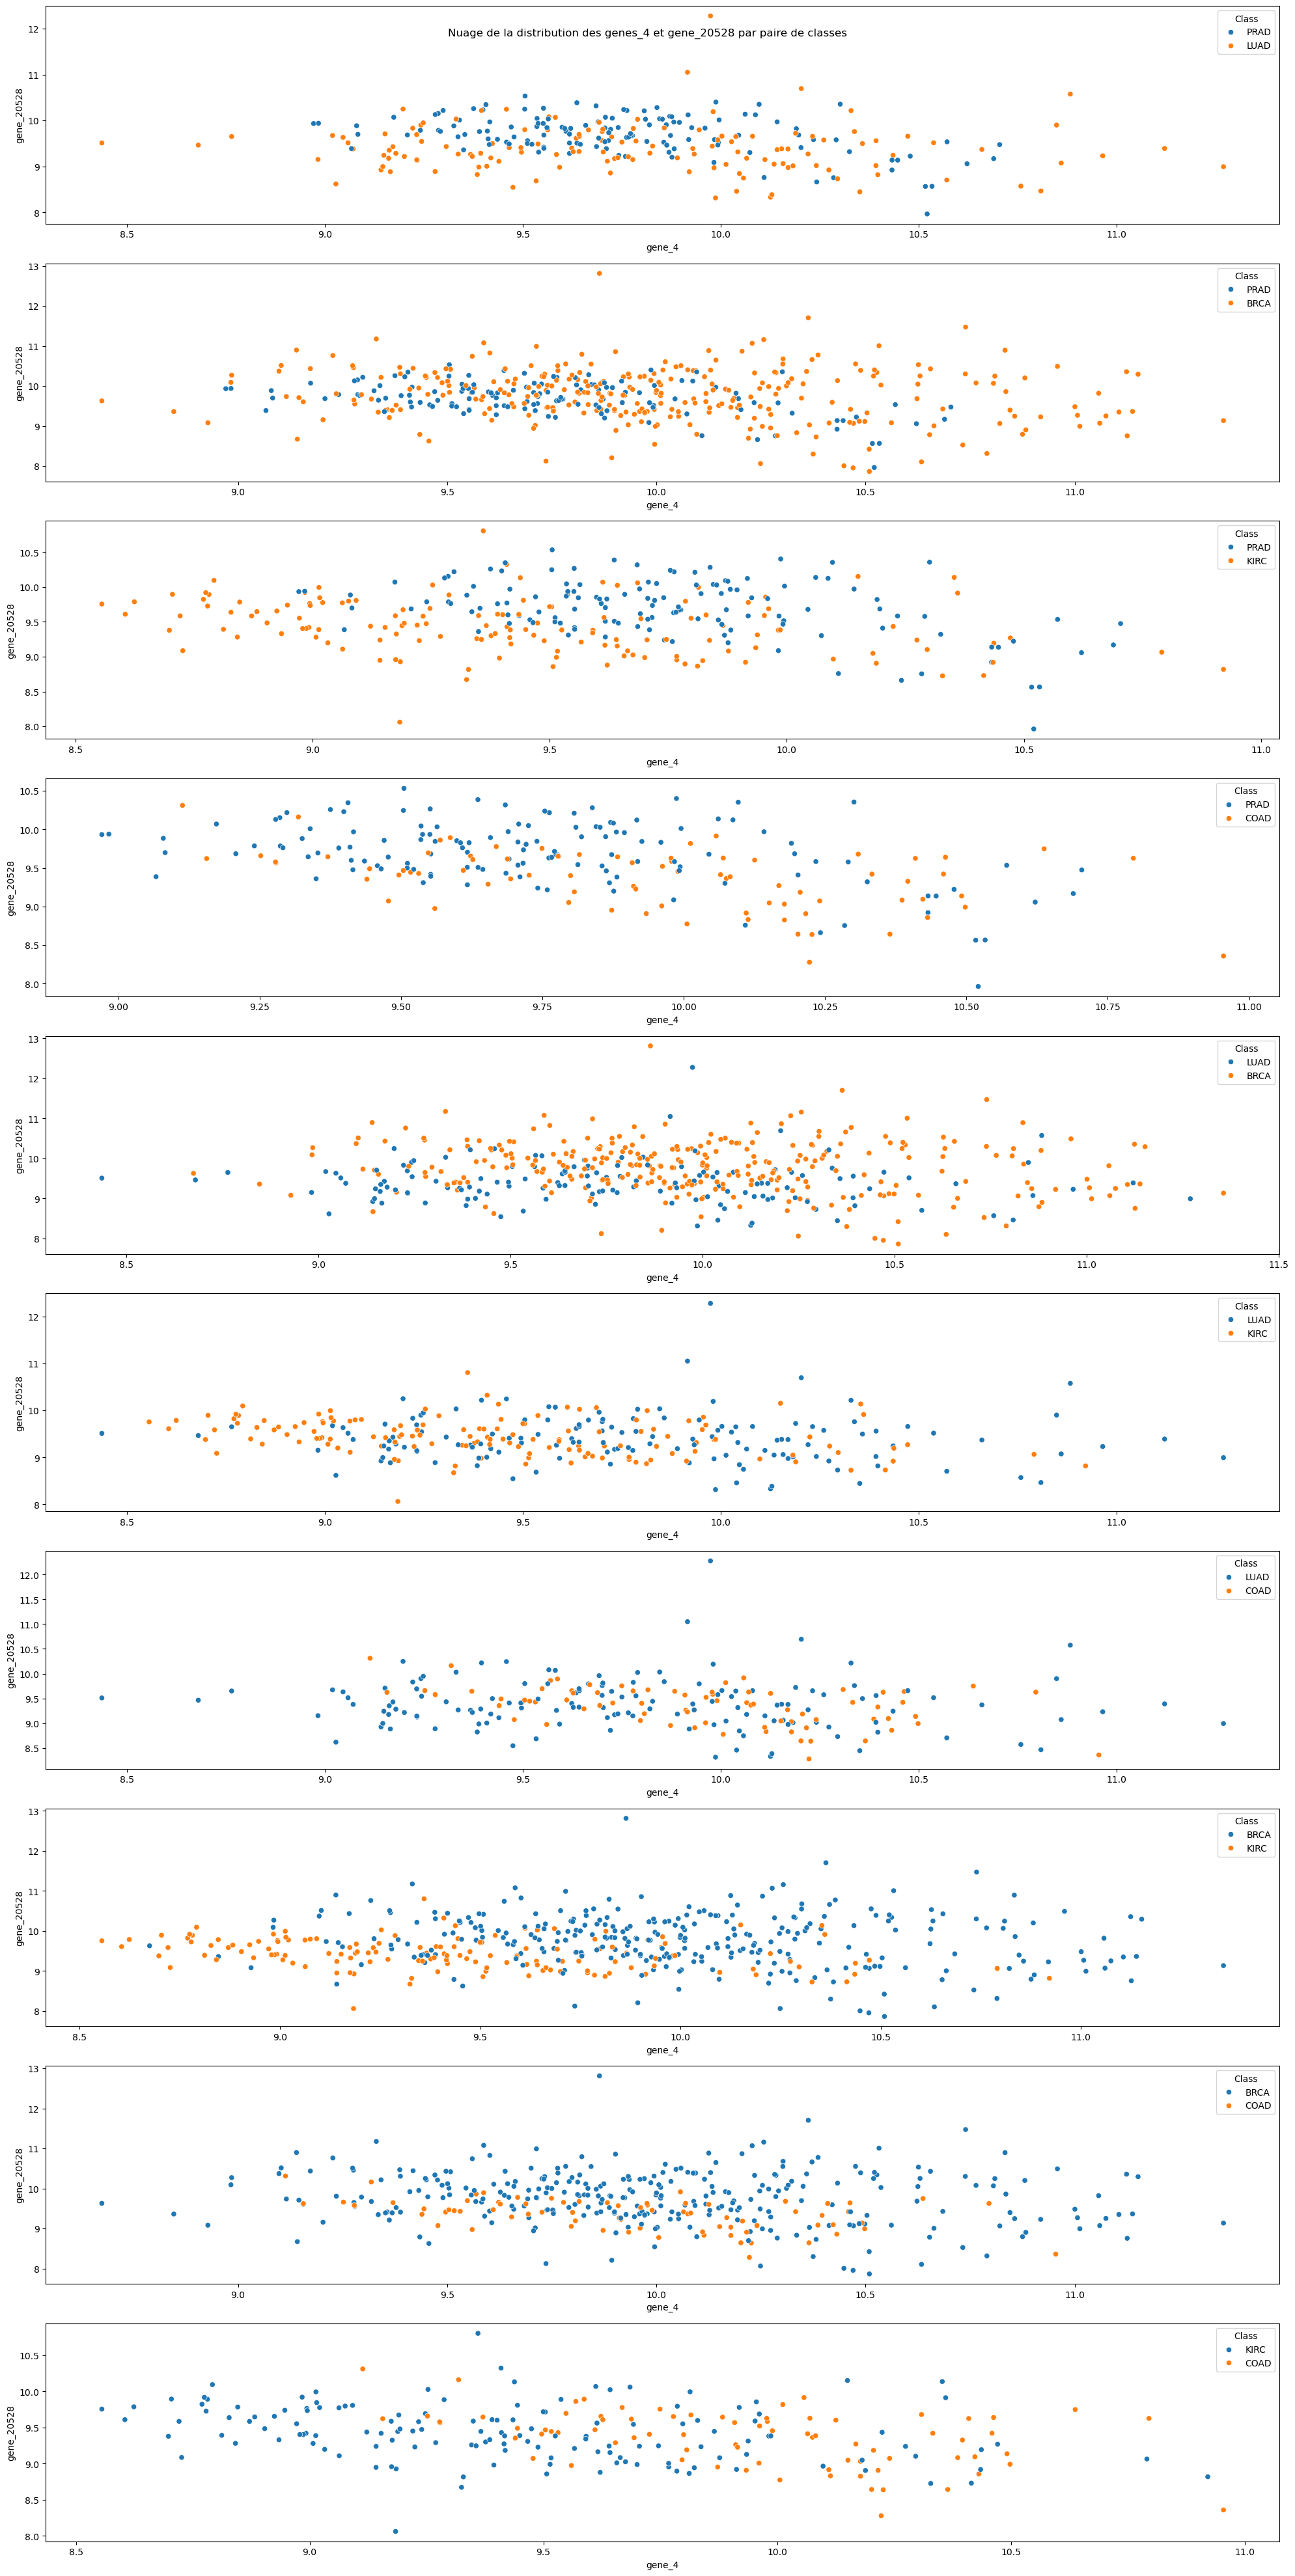

In [53]:
#Nuage de points
fig, axs = plt.subplots(10, 1, figsize=(20, 40))
axs=axs.flatten()

indx=0
for i,j in itertools.combinations(liste_classe, 2):
    
    if indx!=10:
        data = df_filtree[(df_filtree['Class'] == i) | (df_filtree['Class'] == j)]
        sns.scatterplot(data=data, x="gene_4", y="gene_20528", hue="Class", ax=axs[indx])
        indx+=1
    else:
        break
    

plt.suptitle("Nuage de la distribution des genes_4 et gene_20528 par paire de classes")
plt.tight_layout()
plt.show()


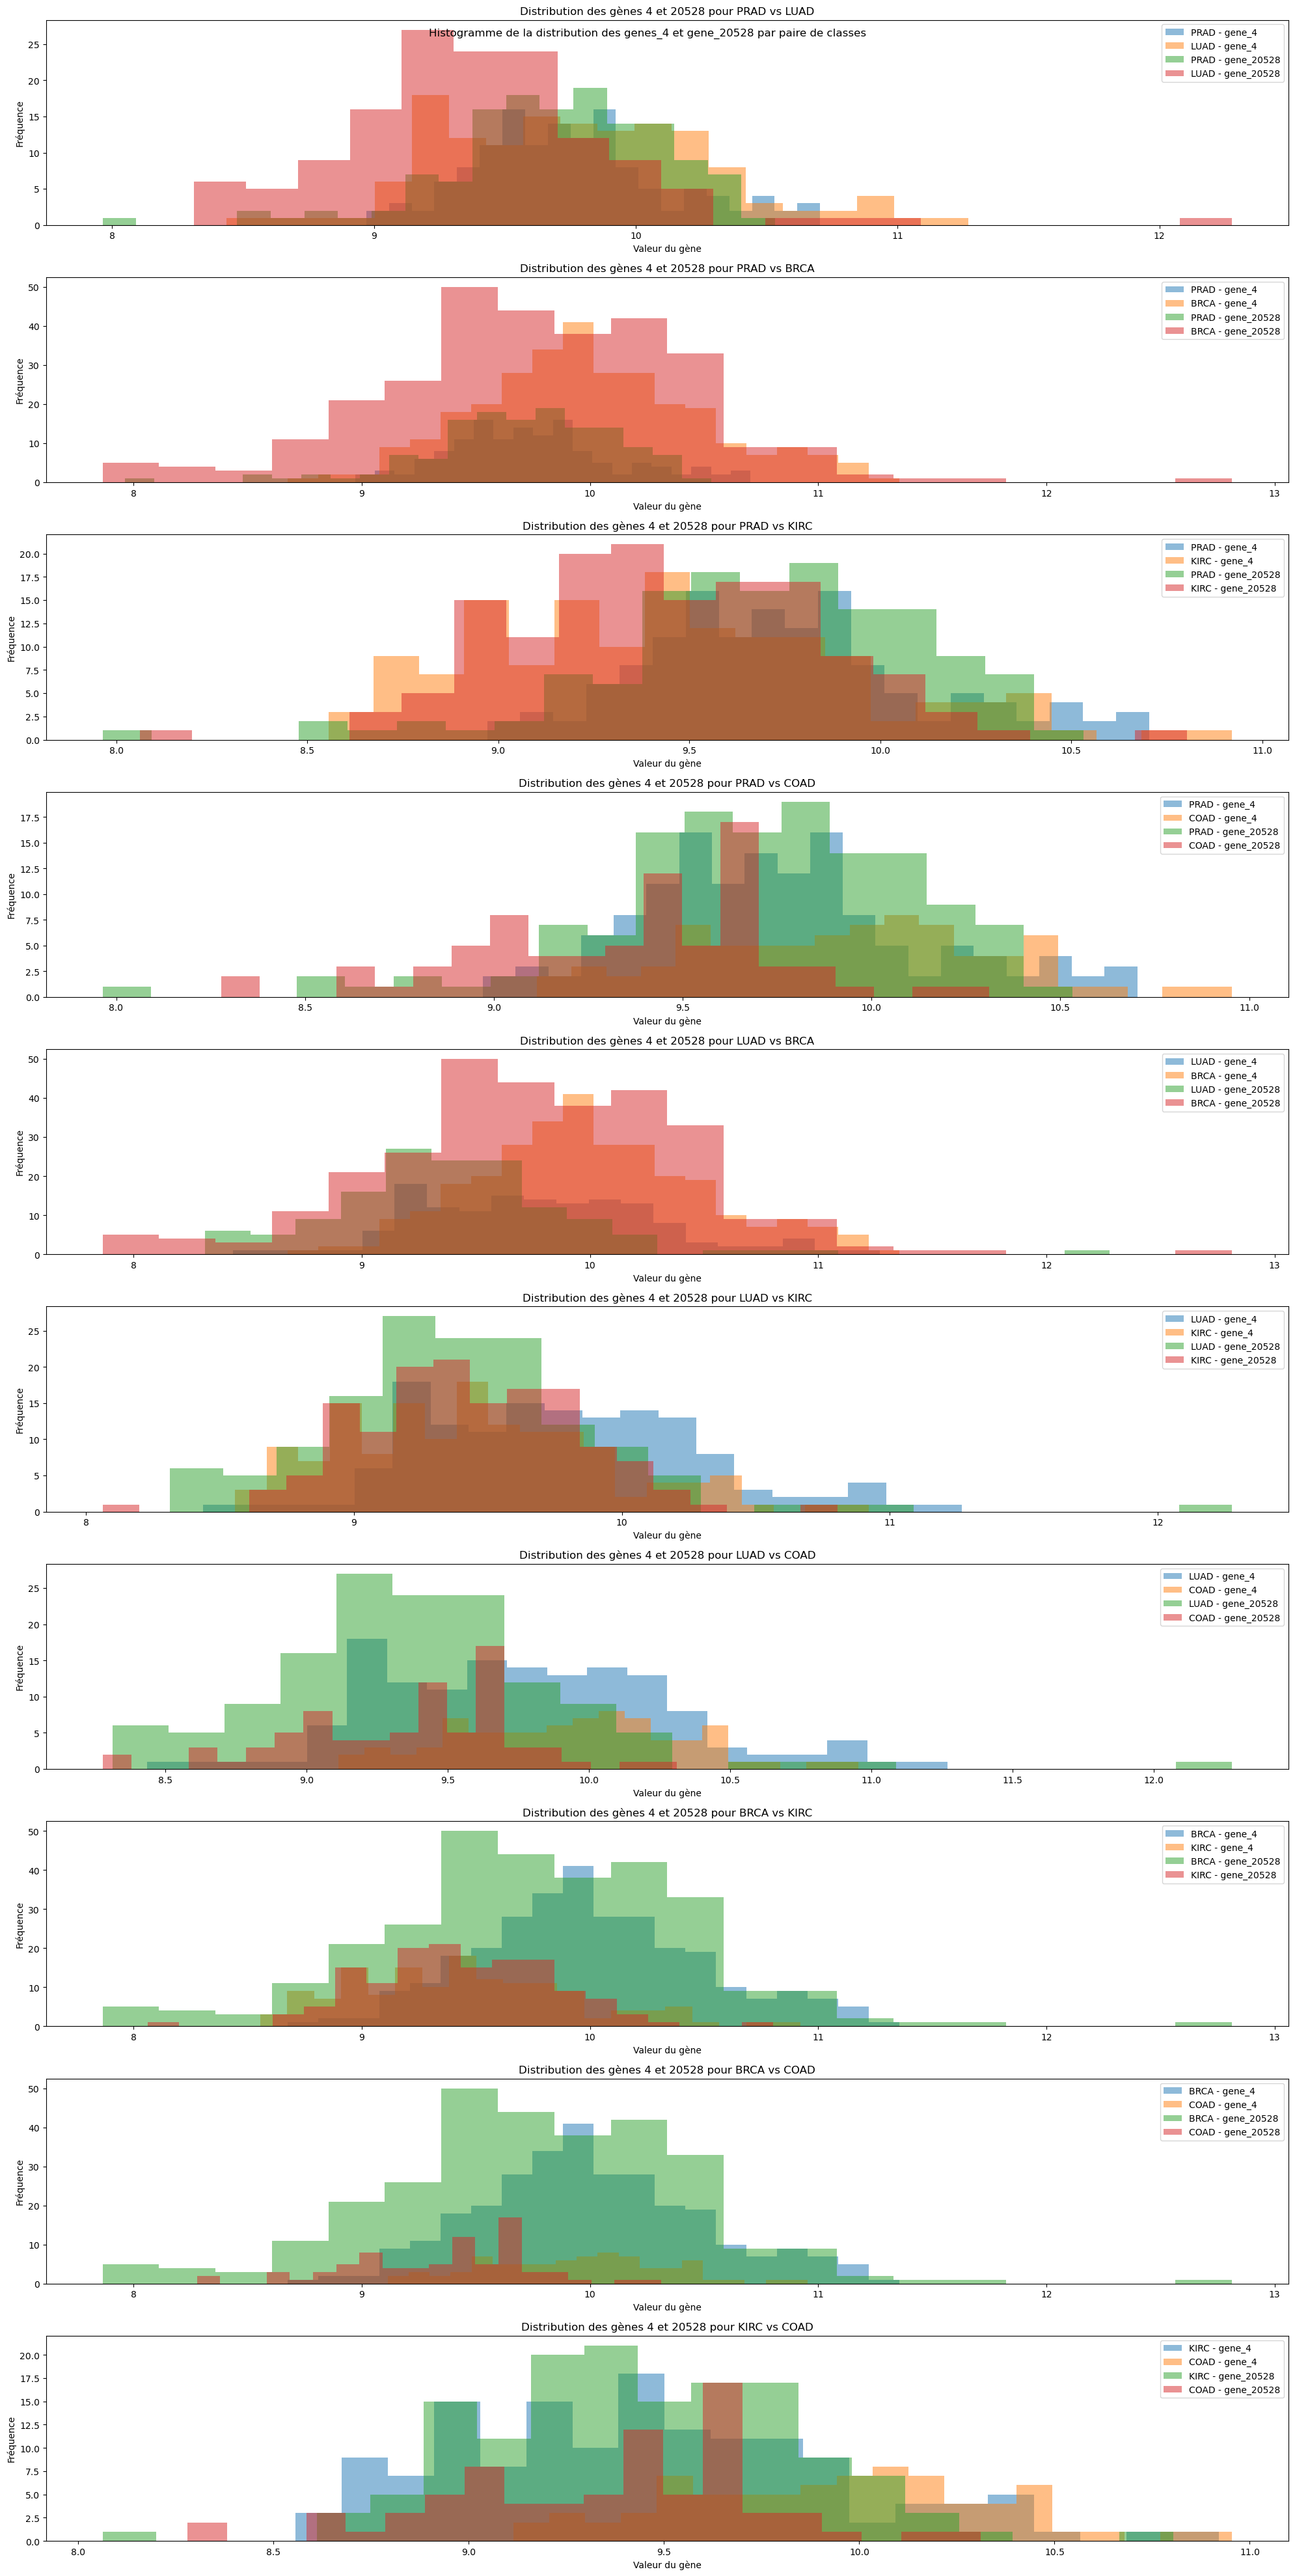

In [60]:
#Histogramme
fig,axs = plt.subplots(10, 1, figsize=(20, 40)) 

axs=axs.flatten()

indx=0
for i,j in itertools.combinations(liste_classe, 2):
    
    if indx<10:
        data = df_filtree[(df_filtree['Class'] == i) | (df_filtree['Class'] == j)]
        
        # Histogramme pour gene_4
        axs[indx].hist(data[data['Class'] == i]['gene_4'], bins=20, alpha=0.5, label=f"{i} - gene_4")
        axs[indx].hist(data[data['Class'] == j]['gene_4'], bins=20, alpha=0.5, label=f"{j} - gene_4")
        
        # Histogramme pour gene_20528
        axs[indx].hist(data[data['Class'] == i]['gene_20528'], bins=20, alpha=0.5, label=f"{i} - gene_20528")
        axs[indx].hist(data[data['Class'] == j]['gene_20528'], bins=20, alpha=0.5, label=f"{j} - gene_20528")
        
        axs[indx].set_title(f"Distribution des gènes 4 et 20528 pour {i} vs {j}")
        axs[indx].legend()
        axs[indx].set_xlabel("Valeur du gène")
        axs[indx].set_ylabel("Fréquence")

        indx+=1
    else:
        break
    

plt.suptitle("Histogramme de la distribution des genes_4 et gene_20528 par paire de classes")
plt.tight_layout()
plt.show()

# ACP

In [63]:
n_couleurs={"BRCA":'r',"COAD":'b',"KIRC":'g',"LUAD":'y',"PRAD":'c'}

In [64]:
#ACP
acp = PCA(n_components = 2)
acp_result = acp.fit_transform(df_filtree.drop(columns = ["Class"]))

acp_df = pd.DataFrame(data = acp_result, columns = ["ACP1","ACP2"])
acp_df["Class"] = df_filtree["Class"]

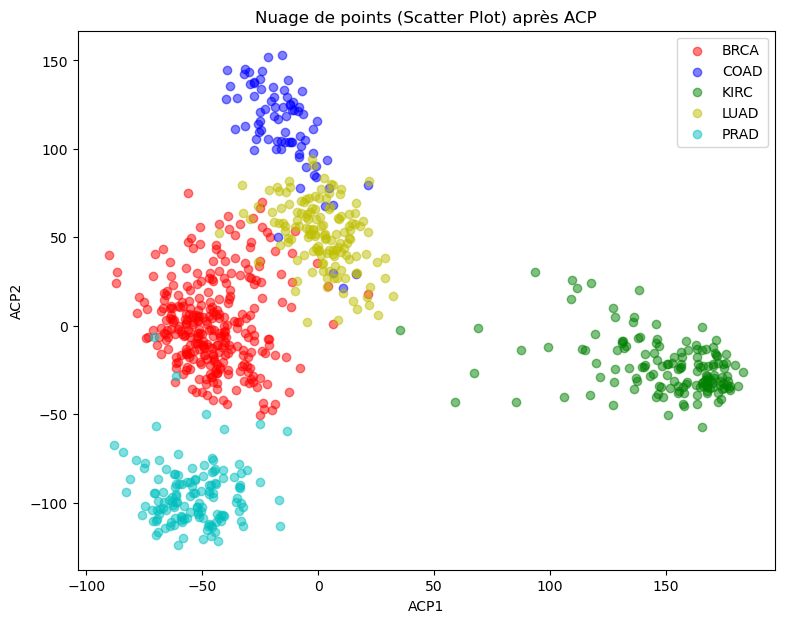

In [65]:
# Affichage d'un nuage de points après transformation ACP
plt.figure(figsize=(9, 7))

for classe, couleur in n_couleurs.items():
    
    subset = acp_df[acp_df["Class"] == classe]
    plt.scatter(subset["ACP1"], subset["ACP2"], c = couleur, label = classe, alpha = 0.5)

plt.xlabel("ACP1")
plt.ylabel("ACP2")
plt.title("Nuage de points (Scatter Plot) après ACP")

plt.legend()
plt.grid(False)

plt.show()

# T-SNE

In [61]:
#T-SNE
# La fonction de la technique TSNE ainsi que ses méthodes proviennent de la librairie sklearn.
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df_filtree.drop(columns=["Class"]))

tsne_df = pd.DataFrame(data=tsne_result, columns=["TSNE1", "TSNE2"])
tsne_df["Class"] = df_filtree["Class"]

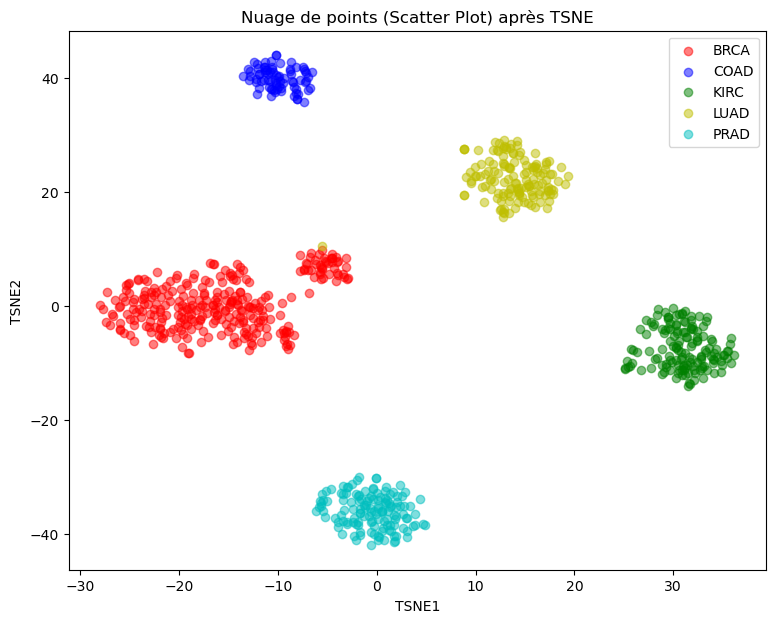

In [62]:
# Affichage d'un nuage de points après transformation TSNE
plt.figure(figsize = (9, 7))

for classe, couleur in n_couleurs.items():
    subset = tsne_df[tsne_df["Class"] == classe]
    plt.scatter(subset["TSNE1"], subset["TSNE2"], c = couleur, label = classe, alpha = 0.5)

plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.title("Nuage de points (Scatter Plot) après TSNE")

plt.legend()
plt.grid(False)

plt.show()

# Notes

- Je vais merge les deux datasets pour avoir la correspondance de chaque espece a sa classe
- Apres je vais faire un pre-traitement vu qu'il y'a beaucoup de colonnes qui n'ont pas assez d'informations (Beaucoup de 0). La colonne Unamed:0 pourra etre enleve aussi.
- Ensuite je pourrai proceder au calcul de distance
- distance euclidienne la fonction nous permet l'operation par vecteur
- distance cosinus on doit parcourir le df par ligne et faire l'addition
- Lors du calcul de la matrice inv on a utilise pinv() au lieu de lieu de inv() par ce que les matrices ne sont pas carres
- Les classes sont bien separees avec la distance mahalanobis contrairement aux autres
- Pour la visualisation, la bonne paire de classes va correspondre a un ensemble de deux attributs les moins correles possibles